In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn import linear_model
import sklearn.model_selection
% matplotlib inline

In [6]:
df = pd.read_csv("College.csv")

In [7]:
data = df.values
data1 = data[:,2:19]
X = data1[:,0:16]
Y = data1[:,16]

# Splitting Data Into Training and Test Set

In [8]:
X_tr = X[0:390,:]
Y_tr = Y[0:390]
X_test = X[390:777,:]
Y_test = Y[390:777]

# Fitting Linear Model

In [10]:
regr = linear_model.LinearRegression()
regr.fit(X_tr,Y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Test Error

In [11]:
predict = regr.predict(X_test) 
test_error = np.sum(np.square(Y_test - predict)) / (2 * Y_test.shape[0]) 
print(test_error)

91.68372103002557


# Lasso Regression

In [12]:
# Creating the object of the model.
model = linear_model.Lasso(warm_start=True, fit_intercept = True )
# We use the `warm start` parameter so that the fit will start at the previous value.
# This speeds up the fitting. 
# Even if it is False, it doesn't make much difference in the final solution and not so important parameter.

In [13]:
nalpha = 100 # Number of alpha values we try to use to fit the model
alphas = np.logspace(-3,2,nalpha) # 100 log spaced valued between 10^-3 to 10^2. 
print(alphas) 

[  1.00000000e-03   1.12332403e-03   1.26185688e-03   1.41747416e-03
   1.59228279e-03   1.78864953e-03   2.00923300e-03   2.25701972e-03
   2.53536449e-03   2.84803587e-03   3.19926714e-03   3.59381366e-03
   4.03701726e-03   4.53487851e-03   5.09413801e-03   5.72236766e-03
   6.42807312e-03   7.22080902e-03   8.11130831e-03   9.11162756e-03
   1.02353102e-02   1.14975700e-02   1.29154967e-02   1.45082878e-02
   1.62975083e-02   1.83073828e-02   2.05651231e-02   2.31012970e-02
   2.59502421e-02   2.91505306e-02   3.27454916e-02   3.67837977e-02
   4.13201240e-02   4.64158883e-02   5.21400829e-02   5.85702082e-02
   6.57933225e-02   7.39072203e-02   8.30217568e-02   9.32603347e-02
   1.04761575e-01   1.17681195e-01   1.32194115e-01   1.48496826e-01
   1.66810054e-01   1.87381742e-01   2.10490414e-01   2.36448941e-01
   2.65608778e-01   2.98364724e-01   3.35160265e-01   3.76493581e-01
   4.22924287e-01   4.75081016e-01   5.33669923e-01   5.99484250e-01
   6.73415066e-01   7.56463328e-01

In [15]:
test_errors = []  # To store values of test errors for different alphas.
for i in range(100):
    model.alpha = alphas[i]
    model.fit(X_tr,Y_tr)
    pred = model.predict(X_test)
    test_err = np.sum(np.square(Y_test - pred)) / (Y_test.shape[0])
    test_errors.append(test_err)
    if(i==99):
        coeff = model.coef_
        intercept = model.intercept_

# Plotting Test Error v/s Alpha

In [16]:
test_errors

[183.36760180322176,
 183.3676207287045,
 183.36764279634332,
 183.36766760310726,
 183.36769548275174,
 183.36772681759015,
 183.36776203816848,
 183.36780162929594,
 183.36784613703807,
 183.36789617665428,
 183.36795244161794,
 183.36801571387218,
 183.36808687551368,
 183.36816692211667,
 183.3682569779584,
 183.36835831344254,
 183.36847236507597,
 183.368600758425,
 183.36874533454733,
 183.3689081805001,
 183.36909166464108,
 183.36929847758216,
 183.369531679833,
 183.36979475739076,
 183.37009168679558,
 183.3704270115047,
 183.37080593184152,
 183.37123441128696,
 183.37171930249548,
 183.37226849720892,
 183.37289110519902,
 183.3735976685784,
 183.37440041932717,
 183.37531358975883,
 183.376353788,
 183.3775404535,
 183.3788964112738,
 183.3804485481923,
 183.38222864043888,
 183.38414400313587,
 183.38602236622214,
 183.38813538850312,
 183.3905651029102,
 183.39336548225776,
 183.39660083916425,
 183.40034828537748,
 183.40470058774704,
 183.4097697081155,
 183.415691201

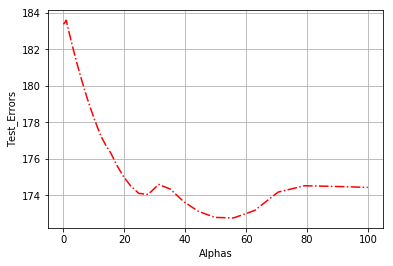

In [12]:
plt.plot(alphas,test_errors,'-.',color='r')
plt.xlabel('Alphas')
plt.ylabel('Test_Errors')
plt.grid()

We see that the test cost is going down with increasing alpha. We can check this for even higher values of alpha but then we see that many more co-efficients will become 0 as you see below and our model will start loosing information. Also, it will lead to underfitting after some time.

In [17]:
print(coeff)
print(intercept)

[ 0.00258652 -0.00147188 -0.          0.          0.         -0.0003324
 -0.0021946   0.00183295  0.00197916 -0.         -0.0011776   0.          0.
 -0.          0.         -0.00037339]
41.6766986245


In [18]:
non_zero_coeff = np.sum(coeff!=0)
print("Number of non-zero coefficients including the intercept is :")
print(non_zero_coeff + 1)

Number of non-zero coefficients including the intercept is :
9


In [15]:
print(np.min(test_errors))

172.764825771
